In [1]:
import welly
w = welly.Well.from_las('data/2090867.las')

In [2]:
w

Well(uwi: '5083067080000', 16 curves: ['GR', 'TENS', 'GRTO', 'GRTC', 'POTA', 'URAN', 'THOR', 'TURT', 'UKRT', 'TKRT', 'ERPO', 'ERUR', 'ERTH', 'ERTO', 'ERTC', 'AMCR'])

In [3]:
logs = ['POTA', 'THOR', 'URAN']

import numpy as np
data = np.array([w.data[log] for log in logs]).T

In [4]:
data.shape

(703, 3)

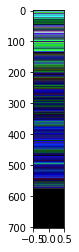

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(data.reshape(-1, 1, 3), aspect=0.01)

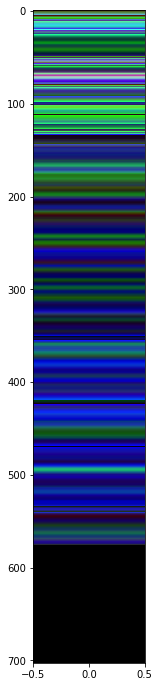

In [6]:
plt.figure(figsize=(2, 12))
plt.imshow(data.reshape(-1, 1, 3), aspect='auto')

Everything after this is just window dressing really. 

We should normalize the data for display, because POTA is in % and URAN and THOR are in ppm, and they all have different ranges. Of course, how we do that is up to us, but I'll try something naive first.

Also, it seems we have a lot of stuff with low GR, and a few big spikes. This makes is hard to see the display. So we can apply some nonlinear scaling... how about just taking the square root for now?

Also, maybe it would be nice to see the 

In [7]:
data.shape

(703, 3)

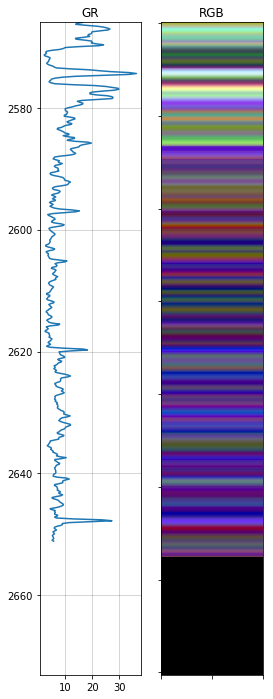

In [8]:
def normalize(data):
    return (data - np.nanmin(data)) / (np.nanmax(data) - np.nanmin(data))

data = np.array([normalize(w.data[log]) for log in logs]).T
gr = w.data['GR']

fig, axs = plt.subplots(figsize=(4, 12), ncols=2)
axs[0].plot(gr, gr.basis)
axs[0].set_ylim(gr.stop, gr.start)
axs[1].imshow(np.sqrt(data.reshape(-1, 1, 3)), aspect='auto')
axs[1].set_yticklabels([])
axs[1].set_xticklabels([])
axs[0].set_title('GR')
axs[1].set_title('RGB')
axs[0].grid(color='k', alpha=0.2)
plt.show()